In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy 
import random
import math

%matplotlib inline

## Problème
<br>
<font size="3">Est ce que l'on peut prédire que dans un match donné il y aura 3 buts ou plus ?</font>

## Partie 1 - Description du problème
<br>
<font size="3">Dans le jeu de données fournies, nous avons les attributs home_team_goal et away_team_goal qui représentent le nombre de buts marqués par l'équipe qui est à domicile (respectivement en déplacement). <br>
A partir de ces données nous avons récupéré la moyenne de but dans un match qui est de 2.71. A l'aide de cette moyenne nous nous demandons maintenant si l'on peut prédire, pour un match donné, si le nombre de but total sera supérieur ou égal à trois.</font> 

In [22]:
#donnees_match = pd.read_csv('/Vrac/3I026/soccer/csv/match.csv')
donnees_match = pd.read_csv('C:\\Users\\123cl\\Documents\\soccer\\match.csv')
a = donnees_match["home_team_goal"].mean()
b = donnees_match["away_team_goal"].mean()
print("Quelques informations interessantes pour commencer :")
print()
print("Le nombre de but moyen par match est de " + str(round(a+b,2)))
print("Le nombre de but moyen des equipes lorsqu'elles jouent à domicile est de " + str(round(a,2)))
print("Le nombre de but moyen des equipes lorsqu'elles jouent à l'exterieur est de " + str(round(b,2)))

Quelques informations interessantes pour commencer :

Le nombre de but moyen par match est de 2.71
Le nombre de but moyen des equipes lorsqu'elles jouent à domicile est de 1.54
Le nombre de but moyen des equipes lorsqu'elles jouent à l'exterieur est de 1.16


<font size="3">Nous essayons maintenant de savoir si d'autres paramètres jouent un rôle essentiel concernant le nombre de but marqués dans un match.</font> 

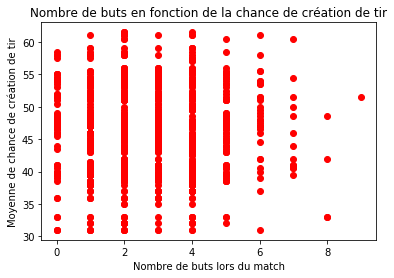

In [23]:
#donnees_equipe = pd.read_csv('/Vrac/3I026/soccer/csv/teamattributes.csv')
donnees_equipe = pd.read_csv('C:\\Users\\123cl\\Documents\\soccer\\teamattributes.csv')
chance = {}
for i in range(len(donnees_equipe)):
    chance[donnees_equipe["team_api_id"][i]] = donnees_equipe["chanceCreationShooting"][i]
    
mean_matchs = []
goals = []
for i in range(1000):
    if donnees_match["home_team_api_id"][i] in chance and donnees_match["away_team_api_id"][i] in chance :
        #if (chance[donnees_match["home_team_api_id"][i]]+chance[donnees_match["away_team_api_id"][i]])/2 not in mean_matchs:
            mean_matchs.append((chance[donnees_match["home_team_api_id"][i]]+chance[donnees_match["away_team_api_id"][i]])/2)
            goals.append(donnees_match["home_team_goal"][i] + donnees_match["away_team_goal"][i])

plt.plot(goals, mean_matchs, 'ro')
plt.ylabel("Moyenne de chance de création de tir")
plt.xlabel("Nombre de buts lors du match")
plt.title("Nombre de buts en fonction de la chance de création de tir")
plt.show()

<font size="3">A l'aide de ce graphique nous pouvons voir que le paramètre renseignant sur la création de tir n'est pas fortement corrélée au nombre de buts par match puisque peut importe la moyenne de chance de création de tir le nombre de but(entre 0 et 5) est atteint avec la même répartition.</font> 

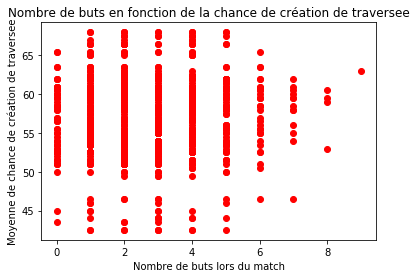

In [24]:
chance = {}
for i in range(len(donnees_equipe)):
    chance[donnees_equipe["team_api_id"][i]] = donnees_equipe["chanceCreationCrossing"][i]
    
mean_matchs = []
goals = []
for i in range(1000):
    if donnees_match["home_team_api_id"][i] in chance and donnees_match["away_team_api_id"][i] in chance :
        #if (chance[donnees_match["home_team_api_id"][i]]+chance[donnees_match["away_team_api_id"][i]])/2 not in mean_matchs:
            mean_matchs.append((chance[donnees_match["home_team_api_id"][i]]+chance[donnees_match["away_team_api_id"][i]])/2)
            goals.append(donnees_match["home_team_goal"][i] + donnees_match["away_team_goal"][i])

plt.plot(goals, mean_matchs, 'ro')
plt.ylabel("Moyenne de chance de création de traversee")
plt.xlabel("Nombre de buts lors du match")
plt.title("Nombre de buts en fonction de la chance de création de traversee")
plt.show()

<font size="3">A l'aide de ce graphique nous pouvons voir que le paramètre renseignant sur la création de traversée est un petit peu corrélée au nombre de buts par match puisque plus le nombre de but augmente plus la moyenne de chance de création de traversée est haute.</font>

In [25]:
# Recuperation des buts marques par les equipes a domicile et en exterieur
mean_home = {}  # Moyenne de but marque par equipe a domicile
mean_away = {}  # Moyenne de but marque par equipe a l'exterieur
goals = {}
for i in range(len(donnees_match)):
    if donnees_match["home_team_api_id"][i] not in mean_home:
        mean_home[donnees_match["home_team_api_id"][i]] = donnees_match["home_team_goal"][i]
    else:
        mean_home[donnees_match["home_team_api_id"][i]] = (mean_home[donnees_match["home_team_api_id"][i]] + donnees_match["home_team_goal"][i])/2
    if donnees_match["away_team_api_id"][i] not in mean_away:
        mean_away[donnees_match["away_team_api_id"][i]] = donnees_match["away_team_goal"][i]
    else:
        mean_away[donnees_match["away_team_api_id"][i]] = (mean_away[donnees_match["away_team_api_id"][i]] + donnees_match["away_team_goal"][i])/2
    goals[(donnees_match["home_team_api_id"][i], donnees_match["away_team_api_id"][i])] = donnees_match["home_team_goal"][i] + donnees_match["away_team_goal"][i]

In [26]:
n = 5
c = random.sample(goals.keys(), n)
for i in range(n):
    print("Equipe " + str(c[i][0]) + "(" + str(mean_home[c[i][0]]) + " buts à domicile par matches en moyenne)")
    print("Equipe " + str(c[i][1]) + "(" + str(mean_away[c[i][1]]) + " buts à l'exterieur par matches en moyenne)")
    print("Resultat du matche entre les deux equipes " + str(goals[c[i]]) + " buts.")
    print()

Equipe 10238(0.533375942267 buts à domicile par matches en moyenne)
Equipe 8348(0.887636458501 buts à l'exterieur par matches en moyenne)
Resultat du matche entre les deux equipes 1 buts.

Equipe 10194(1.68024780334 buts à domicile par matches en moyenne)
Equipe 8549(0.863330841064 buts à l'exterieur par matches en moyenne)
Resultat du matche entre les deux equipes 1 buts.

Equipe 8242(0.676520764828 buts à domicile par matches en moyenne)
Equipe 8244(0.863457616419 buts à l'exterieur par matches en moyenne)
Resultat du matche entre les deux equipes 1 buts.

Equipe 8658(1.0433517787 buts à domicile par matches en moyenne)
Equipe 8191(1.0956670419 buts à l'exterieur par matches en moyenne)
Resultat du matche entre les deux equipes 3 buts.

Equipe 9905(0.449672429041 buts à domicile par matches en moyenne)
Equipe 8460(0.565216064453 buts à l'exterieur par matches en moyenne)
Resultat du matche entre les deux equipes 5 buts.



<font size="3">En regardant les résultats obtenu nous pouvons voir que dans beaucoup de matches le résultat obtenu est plutot représentatif des moyennes de buts des équipes ce qui nous conforte dans l'idée d'utiliser ces statistiques pour notre problématique.</font> 

## Partie 2 - Modèle
<br>

<li>
    <font size="4">Classifieurs :</font>
        <font size="3">
        <ul>K-NN</ul>
        <ul>Perceptron / Kernel trick</ul>
        <ul>Clustering hiérarchique</ul>
        </font>
</li>

<br>

<li>
    <font size="4">Attributs :</font>
        <font size="3">
        <ul>Moyenne des buts des équipes en extérieur</ul>
        <ul>Moyenne des buts des équipes à domicile</ul>
        <ul>Moyenne des chances de créer un centre (attribut ayant l'air intéressant).</ul>
        </font>
</li>

## Partie 3 - Code

In [27]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self,vector,label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x, vector))
            self.y = np.vstack((self.y, label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
    
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
        
    
    #Renvoie la valeur de y_i
    def getY(self, i):
        return(self.y[i])
    
    
    #Renvoie 2 labeledSet depuis 1 
    def split(self, pourcent):
        train = LabeledSet(self.input_dimension)
        test = LabeledSet(self.input_dimension)
        alea = [i for i in range(self.size())]
        random.shuffle(alea)
        for i in range(len(alea)):
            if i < pourcent * self.size() / 100:
                train.addExample(self.getX(alea[i]), self.getY(alea[i]))
            else:
                test.addExample(self.getX(alea[i]), self.getY(alea[i]))
        return train, test

In [28]:
class Classifier:
    def __init__(self,input_dimension):
        """ Constructeur """
        raise NotImplementedError("Please Implement this method")
    
    
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        raise NotImplementedError("Please Implement this method")

    
    # Permet d'entrainer le modele sur un ensemble de données
    def train(self,labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy(self, dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i) > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok / (dataset.size() * 1.0)
        return acc    

In [37]:
# Creation du labeledSet
learning_set = LabeledSet(4)
accuracy_set = LabeledSet(4)
        
# Apprentissage sur l'année 2008 et test sur année 2009 et 2010
for i in range(len(donnees_match)):
    if donnees_match["date"][i][0:4] == "2008":  # Si c'est l'année 2008 on le rentre dans notre base d'apprentissage
        if donnees_match["home_team_api_id"][i] in chance and donnees_match["away_team_api_id"][i] in chance:  
            # Si nous avons les données concernant la création de chance de traversee des deux equipes
            if donnees_match["away_team_goal"][i] + donnees_match["home_team_goal"][i] >= 3:
                # Si il y a eu au moins 3 buts au cours du match cet example sera labele 1
                learning_set.addExample((mean_home[donnees_match["home_team_api_id"][i]], mean_away[donnees_match["away_team_api_id"][i]], chance[donnees_match["home_team_api_id"][i]], chance[donnees_match["away_team_api_id"][i]]), 1)
            else:
                # Sinon -1
                learning_set.addExample((mean_home[donnees_match["home_team_api_id"][i]], mean_away[donnees_match["away_team_api_id"][i]], chance[donnees_match["home_team_api_id"][i]], chance[donnees_match["away_team_api_id"][i]]), -1)
    if donnees_match["date"][i][0:4] == "2009" or donnees_match["date"][i][0:4] == "2010": # Si c'est l'année 2009 ou 2010 on le rentre dans notre base de test
        if donnees_match["home_team_api_id"][i] in chance and donnees_match["away_team_api_id"][i] in chance:
            if donnees_match["away_team_goal"][i] + donnees_match["home_team_goal"][i] >= 3:
                accuracy_set.addExample((mean_home[donnees_match["home_team_api_id"][i]], mean_away[donnees_match["away_team_api_id"][i]], chance[donnees_match["home_team_api_id"][i]], chance[donnees_match["away_team_api_id"][i]]), 1)
            else:
                 accuracy_set.addExample((mean_home[donnees_match["home_team_api_id"][i]], mean_away[donnees_match["away_team_api_id"][i]], chance[donnees_match["home_team_api_id"][i]], chance[donnees_match["away_team_api_id"][i]]), -1)
    

<h4>K-NN</h4>

In [30]:
class KNN(Classifier):
    def __init__(self, input_dimension, k, lset):
        self.input_dimension = input_dimension
        self.k = k
        self.data = []
        self.labeledSet = lset
        
    def train(self, labeledSet):
        for i in range(labeledSet.size()):
            self.data.append((labeledSet.getX(i), labeledSet.getY(i)))
        
    def predict(self, x):
        dist = []
        for i in range(self.labeledSet.size()):
            #d = scipy.spatial.distance.euclidean(x, self.labeledSet.getX(i))
            d = sum((x[j] - self.labeledSet.getX(i)[j])**2 for j in range(len(x)))
            if d != 0:
                dist.append(d)
        dist = np.argsort(dist)
        somme = 0
        for i in range(self.k):
            somme += self.labeledSet.getY(dist[i])
        if somme < 0:
            return -1
        else:
            return 1

<h4>Perceptron Kernel</h4>

In [31]:
class PerceptronKernel(Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel, nb_iterations):
        self.dimension_kernel = dimension_kernel
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.w = np.random.rand(dimension_kernel) * 2 - 1
        self.nb_iterations = nb_iterations
        
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        x = self.kernel.transform(x)
        a = sum(self.w[i]*x[i] for i in range(len(x)))
        return a
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self,labeledSet):
        alea = [k for k in range(labeledSet.size())]
        random.shuffle(alea)
        for j in alea:
            t = self.kernel.transform(labeledSet.getX(j))
            if self.predict(t)*labeledSet.getY(j) < 0:
                self.w = self.w + self.learning_rate * labeledSet.getY(j) * t     
    
    
    def iterate(self, test, training):
        train_acc = []
        test_acc = []
        train_acc.append(self.accuracy(training))
        test_acc.append(self.accuracy(test))
        for i in range(self.nb_iterations):
            old_w = copy.deepcopy(self.w)
            self.train(training)
            train_acc.append(self.accuracy(training))
            test_acc.append(self.accuracy(test))
            if np.array_equal(old_w, self.w):
                break
        return test_acc, train_acc                     
        
        
class KernelPoly:
    def transform(self,x):
        return np.asarray([x[0], x[1], x[0]*x[1], x[0]**2, x[1]**2, x[2], x[3], 1])

In [32]:
class PerceptronKernel2(Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel, n):
        self.dimension_kernel = dimension_kernel
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.w = np.random.rand(dimension_kernel) * 2 - 1 
        self.nb_iterations = n
        
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        x = self.kernel.transform(x)
        a = sum(self.w[i]*x[i] for i in range(len(x)))
        return a
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self,labeledSet):
        alea = [k for k in range(labeledSet.size())]
        random.shuffle(alea)
        for j in alea:
            t = self.kernel.transform(labeledSet.getX(j))
            if self.predict(t)*labeledSet.getY(j) < 0:
                self.w = self.w + self.learning_rate * labeledSet.getY(j) * t   
                
    def iterate(self, training):
        for i in range(self.nb_iterations):
            old_w = copy.deepcopy(self.w)
            self.train(training)
            if np.array_equal(old_w, self.w):
                break                     

class ClassifierBaggingPerceptronKernel(Classifier):
    def __init__(self, nb_perceptron, input_dimension, learning_rate, echantillon, remise, kernel, n):
        self.nb_perceptron = nb_perceptron
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        self.echantillon = echantillon
        self.remise = remise
        self.kernel = kernel
        self.liste = []
        self.n = n
        
    def train(self, labeledSet):
        for i in range(self.nb_perceptron):
            perceptronk = PerceptronKernel2(self.input_dimension, self.learning_rate, self.kernel, self.n)  
            pourcentage = int(labeledSet.size()*self.echantillon)  
            perceptronk.iterate(echantillonLS(labeledSet, pourcentage, self.remise))  
            self.liste.append(perceptronk)  
            
    
    def predict(self, x):
        somme = 0  # somme des predictions de chaque arbres
        for i in self.liste:
            somme += i.predict(x)  
        if somme >= 0:  # Si la somme des predictions est nul ou > 0 alors on renvoie +1 sinon -1
            return 1
        else:
            return -1
        
def echantillonLS(labeledSet, m, remise):
    final_ls = LabeledSet(labeledSet.getInputDimension())  # LabeledSet que l'on renverra
    indice_vec = [i for i in range(labeledSet.size())]  # Indice de tous les exemples du labeledSet
    t = tirage(indice_vec, m, remise)  # On choisit aleatoirement m indice de indice_vec
    for i in t:  # Pour chaque indice choisi
        final_ls.addExample(labeledSet.getX(i), labeledSet.getY(i))  # On recupere cet exemple dans le labeledSet et on 
        # l'ajoute au labeledSet final
    return final_ls

def tirage(vec, m, remise):
    vec_tirage = []  # Vecteur final
    if remise:  # Si tirage avec remise
        for i in range(m):  # On choisit m element de maniere aleatoire de vec qu'on ajoute a vec_tirage
            elt = random.choice(vec)
            vec_tirage.append(elt)
    else:
        vec_tirage = random.sample(vec, m)  # On ajoute m element de vec sans doublon et de maniere aleatoire
    return vec_tirage

<h4>Clustering hiérarchique</h4>

In [33]:
def initialise(m):
    dic = {}
    for i in range(len(m)):
        dic[i] = m[i]
    return dic

def dist_vect(x1, x2):
    s = 0
    for i in range(len(x1)):
        s += (x2[i] - x1[i])**2 
    return math.sqrt(s)

def fusionne(c):
    dist = 1000000000
    pp1 = 0
    pp2 = 1
    for i,j in c.items():
        for k,l in c.items():
            if not np.array_equal(j, l):
                if dist_vect(j, l) < dist:
                    dist = dist_vect(j, l)
                    pp1 = i
                    pp2 = k
    del c[pp1]
    del c[pp2]
    return (c, pp1, pp2, dist)

def clustering_hierarchique(data):
    courant = initialise(data)      
    M_Fusion = []  
    while len(courant) >=2 and i < 10000:  
        new,k1,k2,dist_min = fusionne(courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new
    return M_Fusion

## Partie 4 - Résultats

<h4>Résultat K-NN</h4>

In [34]:
knn = KNN(4, 5, learning_set)
knn.train(learning_set)
print("Accuracy avec l'algorithme knn " + str(knn.accuracy(accuracy_set)) + ".")

Accuracy avec l'algorithme knn 0.5093696763202725.


<h4>Résultat PerceptronKernel</h4>

Accuracy avec l'algorithme PerceptronKernel 0.4938826080223014.


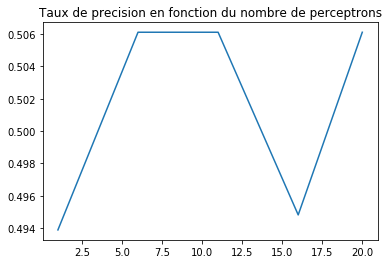

In [35]:
N=100
k=KernelPoly()
perceptron_k=PerceptronKernel(8, 0.01, k, N)
a, b = perceptron_k.iterate(accuracy_set, learning_set)
print("Accuracy avec l'algorithme PerceptronKernel " + str(a[len(a)-1]) + ".") 

# un exemple d'utilisation:
accuracy_test = []
nb_arbre = [i for i in range(1,21, 5)] + [20]

for i in nb_arbre:
    f = ClassifierBaggingPerceptronKernel(i, 8, 0.01, 0.1, True, KernelPoly(), 20)   # On cree un classifieur avec i arbre
    f.train(learning_set)  # On lance l'apprentissage des i arbres qui auront 100 exemples
    accuracy_test.append(f.accuracy(accuracy_set))  
    
plt.plot(nb_arbre, accuracy_test)
plt.title("Taux de precision en fonction du nombre de perceptrons")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()  

<h4>Résultat Clustering hiérarchique</h4>

In [36]:
### TROP LONG ##

#a = [learning_set.getX(i) for i in range(learning_set.size())]
#clustering_hierarchique(a)

## Partie 5 - Analyse et Conclusion

<font size="3">
Avec tous les différents résultats obtenus nous pouvons déduire un bon nombres de points concernant notre problématique.<br><br>

Malgré les données encourageantes montrant que les moyennes de but marqués par les équipes se retrouvaient lors des matchs cela ne c'est pas retrouvé dans les modèles que nous avons utilisé.<br><br>

En effet l'algorithme K-NN avec k = 5, l'algorithme PerceptronKernel et l'algorithme de bagging, utilisés avec des PerceptronKernel ont un taux de précision d'environ 50%.<br><br>

Ces résultats nous indiquent que les données utilisés pour entrainer les modèles ne sont pas pertinantes ou pas assez précises.<br><br>

Il est possible qu'avec une utilisation différentes des données, nous puissions obtenir des résultats plus satisfaisant, car nous avons fait nos expériences en utilisant comme base d'apprentissage les matches qui se sont déroulés en 2008 et en base de test les matches qui se sont déroulés en 2009 et 2010.<br>
Il est donc possible qu'utiliser une autre année en base d'apprentissage nous permette d'obtenir de meilleurs résultats.<br><br>

Malheureusement le temps de calcul est déjà très long pour l'année 2009 et de ce fait nous n'avons pas pu tester pour chaque années.<br><br>

Un autre point nous auras surpris. en effet malgré une recherche approfondie sur la base de données nous n'avons pas réussi à trouver un attribut fortement coréler avec le nombre de buts total marqué par match.
C'est surement, en partie, à cause de cette raison que nos modèles n'ont pas de bons résultats.<br><br>

En conclusion, il n'a pas l'air possible de concevoir un modèle permettant d'avoir des prédictions concernant la problématique que nous avons proposé. Les modèles que nous avons mis en place sont en moyennes aussi bon qu'un tirage successif et aléatoire d'une réponse "oui" ou "non", ce qui n'est pas très concluant pour des modèles dit "prédictif". 
</font>